# An Exploration of Congressional Voting Behaviour: Technical Notebook

In [ ]:
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import hypothesis_tests as h
import visualizations as v
import functions as f
import test_data_cleaning as t
import data_prep as d

## Pull API date and save to CSV - hashed out - include information about API data

Data source: This study uses Congressional data from [ProPublica Congress API](https://www.propublica.org/datastore/api/propublica-congress-api).  This study uses specifically the Congressional Voting Data from the ProPublica API.

### Requesting API Data

In [8]:
"""download ProPublica Congress vote data for Senate
and save to CSV"""
# unhash to pull API data
# f.get_vote_data_senate()

'download ProPublica Congress vote data for Senate\nand save to CSV'

In [9]:
"""download ProPublica Congress vote data for House
and save to CSV"""
# unhash to pull API data
# f.get_vote_data_house()

'download ProPublica Congress vote data for House\nand save to CSV'

## Load raw (dirty) data CSV, clean data and save merged dataset

### Cleaning operations executed:
- remove columns in House not present in Senate
  - function name: remove_extra_columns_house
  - action: remove the columns that are found in the House df but not in the Senate df. These are columns that are otherwise not being used in our analysis
- merge chambers
  - function name: merge_chambers
  - action: merge data in House and Senate datasets using the Pandas concat method, matching on columns
- drop unneeded columns
  - function name: drop_unnecessary_columns
  - action: drop columns that are not needed in this analysis to make data exploration less cumbersome
- fill nulls
  - function name: fill_null_object
  - action: replace null values with the string 'Null' in columns *democratic_majority_position* and *republican_majority_position*
- change case to lower
  - function name: lowercase_object
  - action: change the case of string values from title or upper case to all lower case; applies to six columns in the merged df
- remove null rows
  - function name: remove_nulls
  - action: remove rows where voting data is null
- fix totals
  - function names: fix_total, fix_total2, fix_total3, fix_total4, fix_total5, fix_total6, fix_total7
  - action: fix totals in various aggregate columns; for example, *republican_present* should be a sum of republicans that voted yes, voted no or didn't vote; in some cases these aggregate columns have an incorrect '0' value
- Create percentage_nonvoting:
    - function name: percentage_nonvoting
    - action: creates columns showing the percentage of nonvoting Republicans, Democrats, and total non-voting for each bill. Defines each as abstain votes divided by a sum of yay, nay, and abstain votes for each party. Removes impossible outliers(non-voting percentage 100% or greater).
- remove column whitespace
  - function name: remove_column_whitespace
  - action: remove whitespace in column names

In [13]:
"""run full_clean function to clean data andsave to CSV
see below for cleaning operations applied"""
d.full_clean().head()

,chamber,congress,date,democratic_majority_position,democratic_no,democratic_not_voting,democratic_present,democratic_yes,independent_no,independent_not_voting,...,total_no,total_not_voting,total_present,total_yes,vote_type,total_no,total_yes,percentage_nonvoting_total,percentage_nonvoting_democratic,percentage_nonvoting_republican
0,senate,103,1993-02-25,yes,0.0,1.0,57.0,56.0,0.0,0.0,...,2.0,4.0,100.0,94.0,1/2,2.0,94.0,0.04,0.017544,0.069767
1,senate,103,1993-02-24,no,52.0,1.0,57.0,4.0,0.0,0.0,...,69.0,2.0,100.0,29.0,1/2,69.0,29.0,0.02,0.017544,0.023256
2,senate,103,1993-02-24,no,44.0,0.0,57.0,13.0,0.0,0.0,...,56.0,1.0,100.0,43.0,1/2,56.0,43.0,0.01,0.000000,0.023256
3,senate,103,1993-02-24,no,51.0,1.0,57.0,5.0,0.0,0.0,...,68.0,2.0,100.0,30.0,1/2,68.0,30.0,0.02,0.017544,0.023256
4,senate,103,1993-02-24,yes,0.0,1.0,57.0,56.0,0.0,0.0,...,0.0,2.0,100.0,98.0,1/2,0.0,98.0,0.02,0.017544,0.023256


## Load clean data

In [14]:
# Load cleaned data
cleaned_data = pd.read_csv('data/cleaned_for_testing.csv')

## Run cleaned data through tests

In [9]:
t.test_if_dataframe(cleaned_data)

In [10]:
t.test_no_null_values(cleaned_data)

In [11]:
t.test_no_duplicates(cleaned_data)

In [12]:
t.test_column_name_whitespace(cleaned_data)

In [13]:
t.test_column_name_lowercase(cleaned_data)

## Analysis
### Questions 1 - 7

What to include for each:
alpha
t-test

In [14]:
h.hypothesis_test_one(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of Republicans and
 Democrats that vote "yay" in congressional bills is equal.

Based on the p value of 0.28999424415735175 and our alpha of 0.05 we fail to reject the null hypothesis.
 Due to these results, we cannot state that there is a difference between the percentage
 of Republicans and Democrats that vote "yay"
.


'Fail to reject'

In [15]:
h.hypothesis_test_two(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of House Republicans and
 Democrats that vote "yay" in congressional bills is equal.

Based on the p value of 0.24457907198904413 and our alpha of 0.05 we fail to reject the null hypothesis.
 Due to these results, we cannot state that there is a difference between the percentage
 of House Republicans and Democrats that vote "yay"
.


'Fail to reject'

In [16]:
h.hypothesis_test_three(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of Senate Republicans and
 Democrats that vote "yay" in congressional bills is equal.

Based on the p value of 0.7622080016813157 and our alpha of 0.05 we fail to reject the null hypothesis.
 Due to these results, we cannot state that there is a difference between the percentage
 of Senate Republicans and Democrats that vote "yay"
.


'Fail to reject'

Hypothesis test four takes as a null hypothesis that the percentages of Republicans and Democrats that abstain from voting when present is equal. It uses the percentage_nonvoting_democratic and percentage_nonvoting_republican columns as its groups. In order to discount variance due to party size, these figures are formed by dividing the total number of abstaining members from each party by the sum of their own party's yay, nay, and abstain votes.

We created 500 sample means of each party's percentage nonvoting. Each sample mean was obtained by taking the mean of thirty random samples. We used the sample means in order to ensure a normal distribution. In addition, we used a high number of sample means with a relatively low number of samples per mean in order to ensure that the p-values were not artificially lowered.

We used the stats program to conduct a two-sided t-test. We used a two-sided test because we only wanted to determine if they were equal, not whether one was larger. Since the p-value was smaller than the requisite alpha level of .0275, we could reject the null hypothesis.

In order to determine the extent of the effect size, we calculated the cohen's d level Given that the absolute value of cohen's d is near .8, we can assume that the variable (party) produces a large effect. In addition, as the power is 1.0, we can say that there is no chance of a type I error.

In [17]:
h.hypothesis_test_four(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of Republicans and
 Democrats that abstain from voting in congressional bills is equal.

Based on the p value of 1.3987358185426177e-30 and our alpha of 0.05 we reject the null hypothesis.
 Due to these results, we can state that there is a difference between the percentage
 of Republicans and Democrats that abstain from voting when present
with an effect size, cohen's d, of -0.7511419113151058 and power of 1.0.


'Reject'

In [18]:
h.hypothesis_test_five(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of congresspeople in
 both the Senate and the House of Representatives that abstain from voting in
 congressional bills is equal.
Based on the p value of 5.404686100642278e-159 and our alpha of 0.05 we reject the null hypothesis.
 Due to these results, we can state that there is a difference between the percentage
 of members from the Senate and House of Representatives that abstain from voting when present
with an effect size, cohen's d, of -2.0566582787109837and power of 1.0.


'Reject'

In [19]:
h.hypothesis_test_six(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of Republicans and
 Democrats that abstain from voting in congressional bills within the Senate is equal.

Based on the p value of 0.2956677080898337 and our alpha of 0.05 we fail to reject the null hypothesis.
 Due to these results, we cannot state that there is a difference between the percentage
 of Republicans and Democrats in the Senate that abstain from voting when present
.


'Fail to reject'

In [20]:
h.hypothesis_test_seven(cleaned_data, alpha = .05)

The purpose of this test is to determine whether the percentages of Republicans and
 Democrats that abstain from voting in congressional bills within the House of
 Representatives is equal.

Based on the p value of 1.6417849187278157e-58 and our alpha of 0.05 we reject the null hypothesis.
 Due to these results, we can state that there is a difference between the percentage
 of Republicans and Democrats in the House of Representatives that abstain from voting when present
with an effect size, cohen's d, of -1.0895722106398331 and power of 1.0.


'Reject'

## Visualization
### Questions 1 - 7

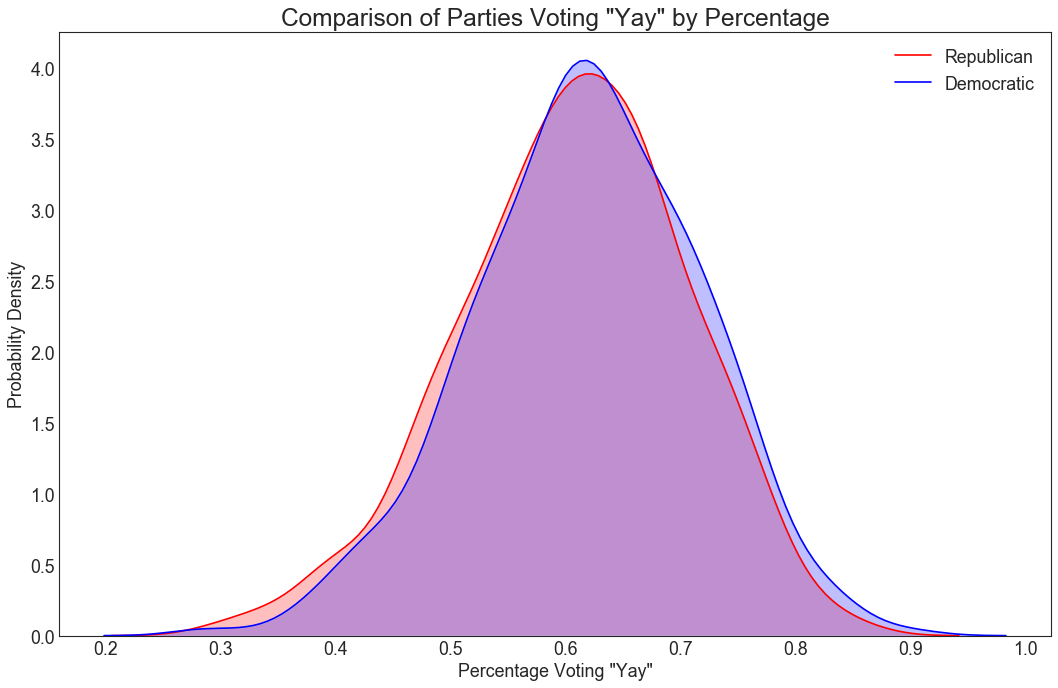

In [21]:
v.visualization_one(cleaned_data)

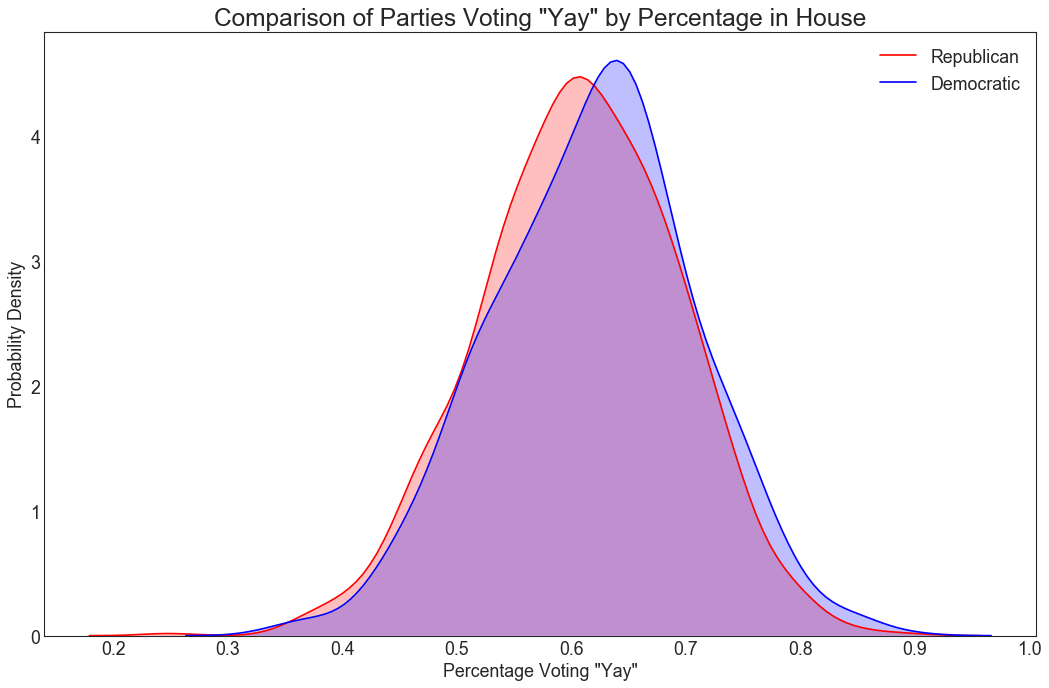

In [22]:
v.visualization_two(cleaned_data)

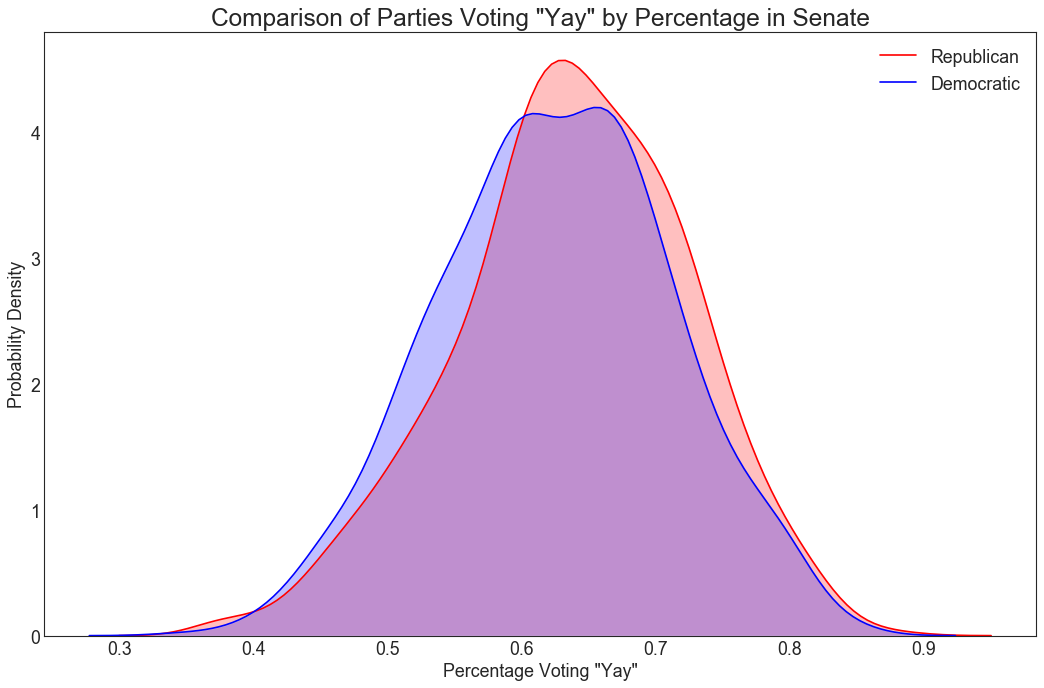

In [23]:
v.visualization_three(cleaned_data)

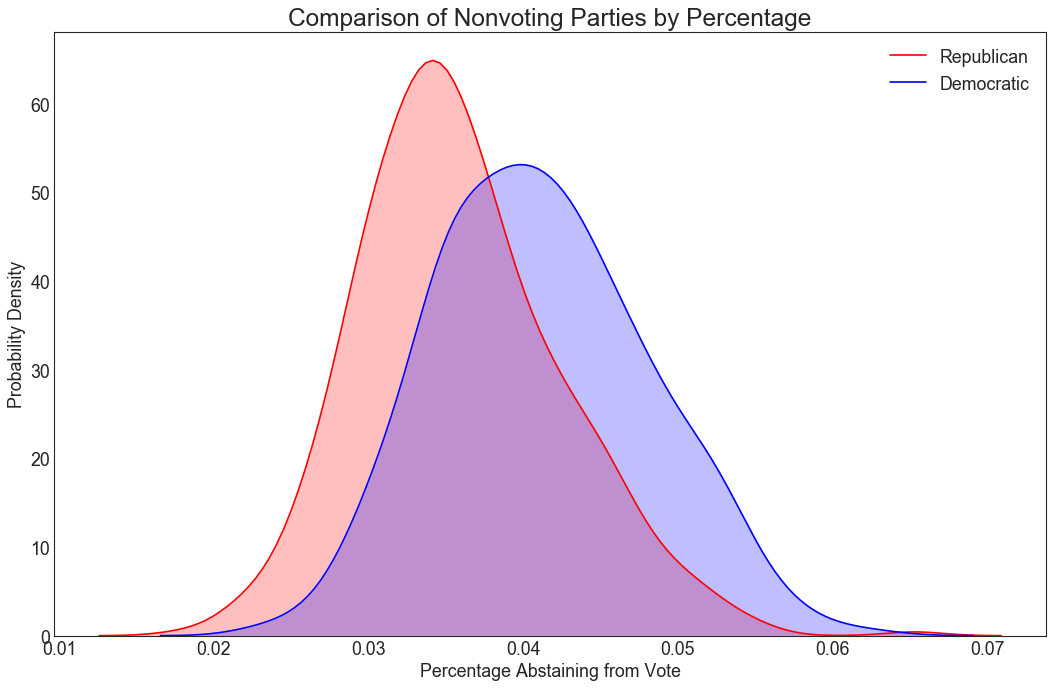

In [24]:
v.visualization_four(cleaned_data)

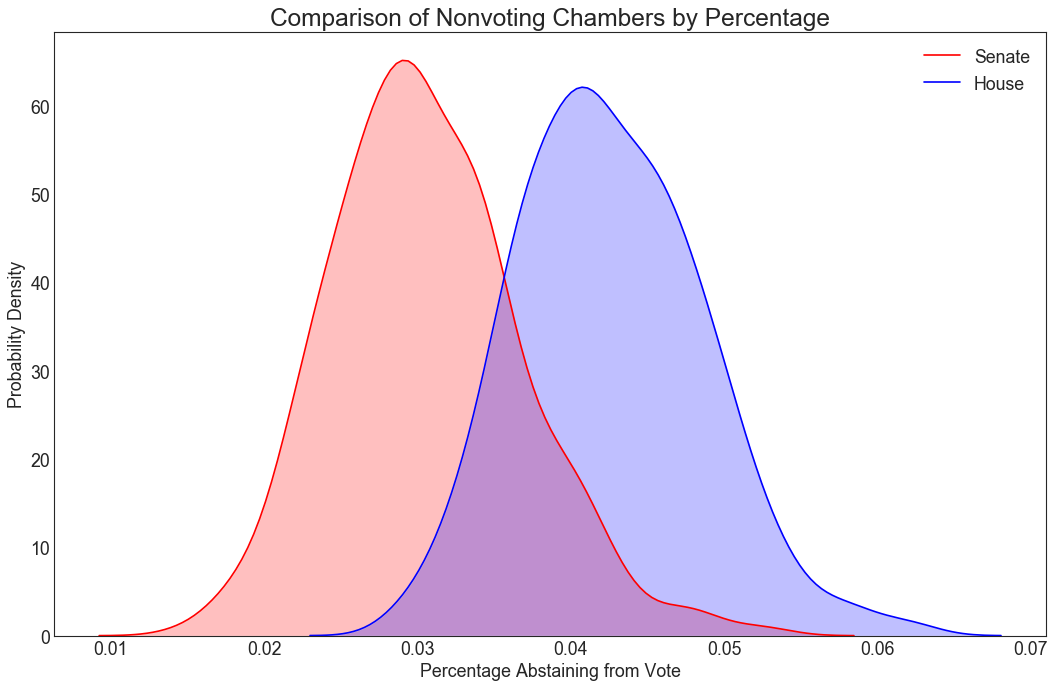

In [25]:
v.visualization_five(cleaned_data)

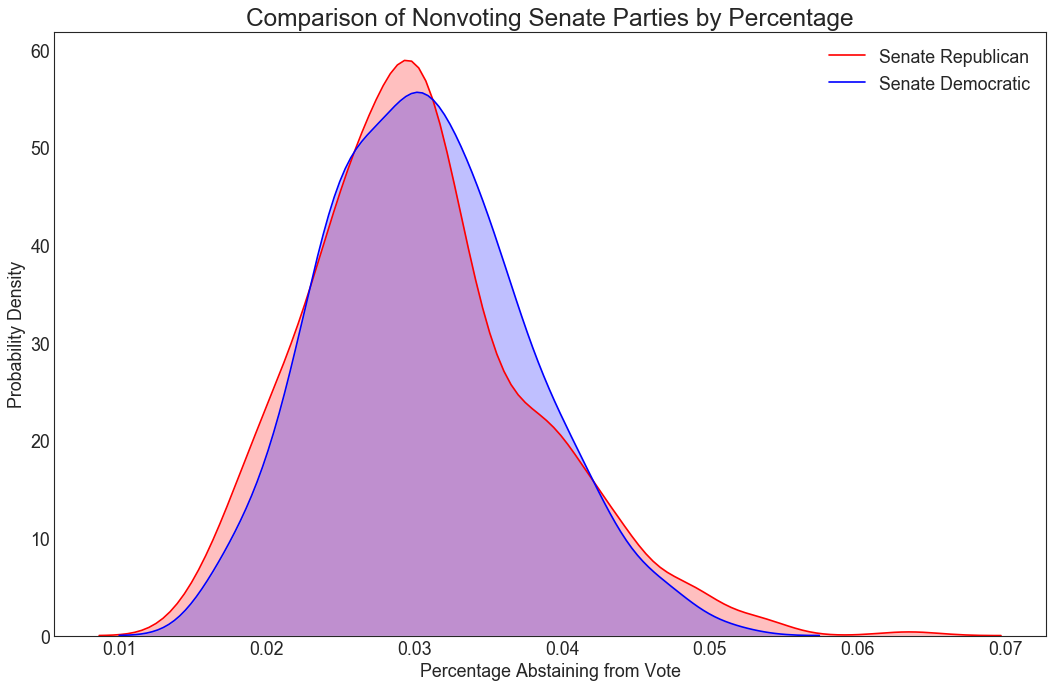

In [26]:
v.visualization_six(cleaned_data)

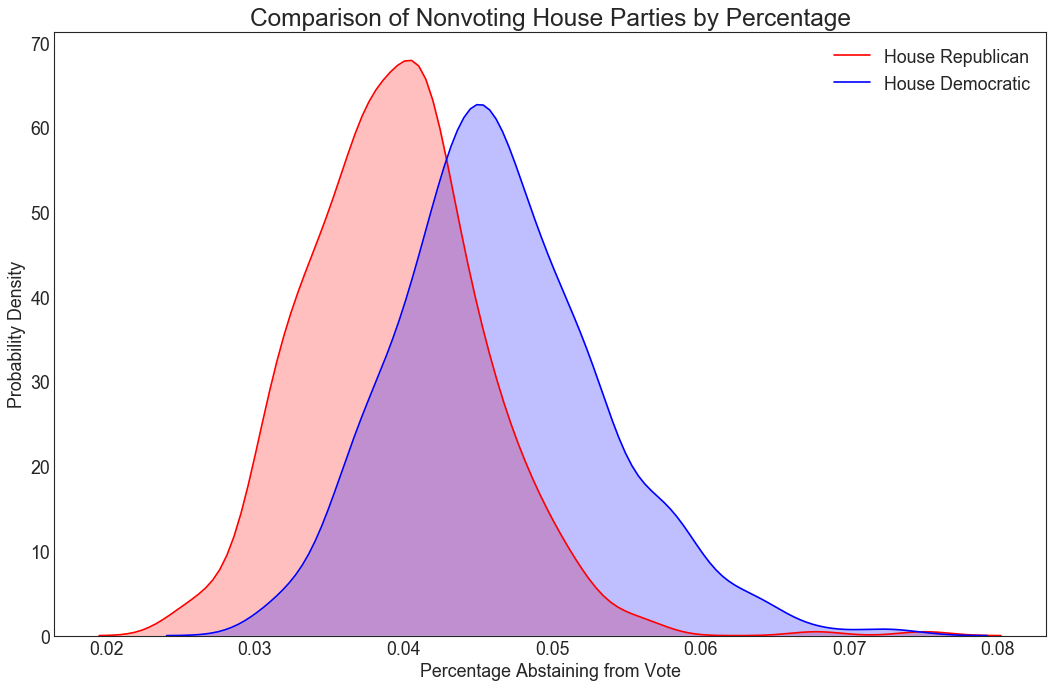

In [27]:
v.visualization_seven(cleaned_data)

## For insights and next steps please refer to Presentation Notebook